<a href="https://colab.research.google.com/github/UFM-Market-Trends/UFM-Market-Trends-SDK/blob/main/examples/2_Agregados_Monetarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install pyxlsb
import datetime
!pip install git+https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git
import ufmtrends_sdk as trends
today = datetime.date.today().strftime("%Y-%m-%d")
# !pip install xlrd
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git to /tmp/pip-req-build-zrzx6x1t
  Running command git clone --filter=blob:none --quiet https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git /tmp/pip-req-build-zrzx6x1t
  Resolved https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git to commit 3657ebf3e027be62b1742dc95be3da5e9adefb27
  Preparing metadata (setup.py) ... done
  Created wheel for ufmtrends-sdk: filename=ufmtrends_sdk-0.0.5-py3-none-any.whl size=7975 sha256=edd7c993ea63e329860b7f84edd6bfe7cf7b268294dae89f483c0414044e7404
  Stored in directory: /tmp/pip-ephem-wheel-cache-_sfizrg1/wheels/17/61/83/be47e25b19b9d500e7fb5ef710f29d33264a77a8a0cd5e1740
Successfully built ufmtrends-sdk
Looking in indexes: https://pypi.org/simple, https://us-python.p

# Agregados Monetarios

https://www.banguat.gob.gt/page/iii-base-monetaria-y-agregados-monetarios

## Base monetaria

Base monetaria restringida y la base monetaria amplia.

https://www.banguat.gob.gt/es/page/iii1-base-monetaria

In [ ]:
monetary_base_data_url = "https://www.banguat.gob.gt/sites/default/files/banguat/estamonfin/estamonfin031.xls"

RESTRICTED_MONETARY_BASE = "Base monetaria restringida"
AMPLE_MONETARY_BASE = "Base monetaria amplia"
def download_monetary_base(monetary_base_url):
  '''
  '''
  monetary_base_df = pd.read_excel(monetary_base_url,
                                  skiprows=10,
                                  skipfooter=3)

  monetary_base_df = monetary_base_df.iloc[:,[2, 6, 16]]


  monetary_base_df.columns = ['date', RESTRICTED_MONETARY_BASE, 
                              AMPLE_MONETARY_BASE]

  start_year = 2001

  start_date = datetime.datetime(year=start_year, 
                                month=12, 
                                day=1)

  months_since_then = len(monetary_base_df["date"]) # trimestres hasta el presente
  months = pd.period_range(start_date, periods=months_since_then,freq='M')

  dates = pd.PeriodIndex(months, freq='M').to_timestamp()

  monetary_base_df["date"] = dates 
  monetary_base_df.insert(loc=1, column="month", value=months, allow_duplicates=True)

  return monetary_base_df


monetary_base_dataframe = download_monetary_base(monetary_base_data_url)
monetary_base_dataframe

,date,month,Base monetaria restringida,Base monetaria amplia
0,2001-12-01,2001-12,13953.206603,20110.667254
1,2002-01-01,2002-01,13770.694284,21513.476565
2,2002-02-01,2002-02,13179.012848,21130.802940
3,2002-03-01,2002-03,14023.223134,21885.391781
4,2002-04-01,2002-04,13901.784139,21873.451127
...,...,...,...,...
247,2022-07-01,2022-07,110714.599072,132860.235484
248,2022-08-01,2022-08,108346.067026,128735.519838
249,2022-09-01,2022-09,111461.673510,128459.257287
250,2022-10-01,2022-10,112442.038854,128354.128151


## Agregados monetarios

Agregados monetarios M1, M2, y M3.

* https://www.banguat.gob.gt/es/page/iii2-agregados-monetarios

In [ ]:
money_supply_data_url = "https://www.banguat.gob.gt/sites/default/files/banguat/estamonfin/estamonfin032.xls"



def download_money_supply(money_supply_url):
  '''
  '''

  money_supply_df = pd.read_excel(money_supply_url,
                                  skiprows=10,
                                  skipfooter=6)
  
  money_supply_df = money_supply_df.iloc[:,[2,5,8,12]]

  money_supply_df.columns = ['date', 'M1', 'M2', 'M3']

  start_year = 2001

  start_date = datetime.datetime(year=start_year, 
                                month=12, 
                                day=1)

  months_since_then = len(money_supply_df["date"])
  months = pd.period_range(start_date, periods=months_since_then,freq='M')

  dates = pd.PeriodIndex(months, freq='M').to_timestamp()

  money_supply_df["date"] = dates 
  money_supply_df.insert(loc=1, column="month", value=months, allow_duplicates=True)

  return money_supply_df

money_supply_dataframe = download_money_supply(money_supply_data_url)
money_supply_dataframe

<ipython-input-3-2e0c165882c9>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  money_supply_df["date"] = dates


,date,month,M1,M2,M3
0,2001-12-01,2001-12,21092.667598,45582.426782,47666.361870
1,2002-01-01,2002-01,20743.871353,45094.942620,47377.420755
2,2002-02-01,2002-02,20665.886020,44982.037708,47511.440033
3,2002-03-01,2002-03,20981.934019,45481.637916,48201.429304
4,2002-04-01,2002-04,20764.568287,45558.341955,48240.330345
...,...,...,...,...,...
247,2022-07-01,2022-07,155871.055521,344884.296906,417665.058047
248,2022-08-01,2022-08,157007.352520,346753.809355,419862.848874
249,2022-09-01,2022-09,158232.155901,349738.927569,421160.637252
250,2022-10-01,2022-10,159642.169363,352467.766003,423515.955548


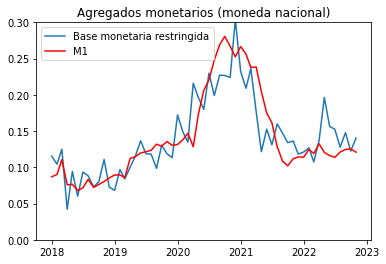

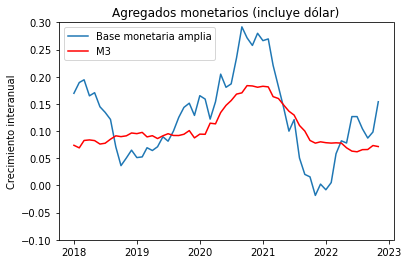

In [ ]:
last_many_months = -12 * 5 + 1

RESTRICTED_BASE_GROWTH = "Crecimiento base monetaria restringida"
M1_SUPPLY_GROWTH = "Crecimiento M1"
AMPLE_BASE_GROWTH = "Crecimiento base monetaria amplia"
M3_SUPPLY_GROWTH = "Crecimiento M3"


money_supply_growth_data = {
    'labels': monetary_base_dataframe['month'][last_many_months:].astype(str),
    'dates': monetary_base_dataframe['date'][last_many_months:],
    RESTRICTED_BASE_GROWTH: trends.get_yearonyear_variation(list(monetary_base_dataframe[RESTRICTED_MONETARY_BASE]),
                                                       inter_values_size=12)[last_many_months:],
    M1_SUPPLY_GROWTH: trends.get_yearonyear_variation(list(money_supply_dataframe['M1']),
                         inter_values_size=12)[last_many_months:],

    #
    AMPLE_BASE_GROWTH: trends.get_yearonyear_variation(list(monetary_base_dataframe[AMPLE_MONETARY_BASE]),
                                                       inter_values_size=12)[last_many_months:],
    M3_SUPPLY_GROWTH: trends.get_yearonyear_variation(list(money_supply_dataframe['M3']),
                         inter_values_size=12)[last_many_months:],
}

plt.plot(money_supply_growth_data['dates'],
         money_supply_growth_data[RESTRICTED_BASE_GROWTH],
         label="Base monetaria restringida"
         )
plt.plot(money_supply_dataframe['date'][last_many_months:],
         money_supply_growth_data[M1_SUPPLY_GROWTH],
         color="red",
         label='M1'
         )
plt.ylim(0,0.30)
# plt.ylabel("Crecimiento interanual")
plt.title("Agregados monetarios (moneda nacional)")
plt.legend()
plt.show()


#
plt.plot(money_supply_growth_data['dates'],
         money_supply_growth_data[AMPLE_BASE_GROWTH],
         label='Base monetaria amplia'
         )
plt.plot(money_supply_dataframe['date'][last_many_months:],
         money_supply_growth_data[M3_SUPPLY_GROWTH],
         color="red",
         label='M3'
         )
plt.ylim(-0.1,0.30)
plt.ylabel("Crecimiento interanual")
plt.title("Agregados monetarios (incluye dólar)")
plt.legend()
plt.show()


In [ ]:
money_supply_growth_csv = "Agregados-Monetarios-Crecimiento-Interanual.csv"
money_supply_growth_df = pd.DataFrame(money_supply_growth_data)
money_supply_growth_df.iloc[:,2:] *= 100
money_supply_growth_df.to_csv(money_supply_growth_csv, index=False)

In [ ]:
# https://colab.research.google.com/notebooks/snippets/gcs.ipynb
from google.colab import auth
auth.authenticate_user()

project_id = 'ufm-market-trends'
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
bucket_path = 'ufm-market-trends/guatemala/agregados-monetarios/agregados-monetarios-crecimiento'
csv_file = money_supply_growth_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Agregados-Monetarios-Crecimiento-Interanual.csv [Content-Type=text/csv]...
/ [1 files][  5.5 KiB/  5.5 KiB]                                                
Operation completed over 1 objects/5.5 KiB.                                      
Copying gs://ufm-market-trends/guatemala/agregados-monetarios/agregados-monetarios-crecimiento/Agregados-Monetarios-Crecimiento-Interanual.csv [Content-Type=text/csv]...
/ [1 files][  5.5 KiB/  5.5 KiB]                                                
Operation completed over 1 objects/5.5 KiB.                                      
labels,dates,Crecimiento base monetaria restringida,Crecimiento M1,Crecimiento base monetaria amplia,Crecimiento M3
2018-01,2018-01-01,11.540718835324125,8.69169062996942,16.948320523018516,7.386264917047441
2018-02,2018-02-01,10.43396677424863,9.009308246508686,18.931196015854063,6.911426443755933
2018-03,2018-03-01,12.491710673024524,11.062010399073223,19.43622583140788,8.274132683474868
2018-04,2018-04-01,4.

## Medios de pago
* M2 moneda nacional http://www.banguat.gob.gt/es/page/en-moneda-nacional-3 (imm18a.xls)
* M2 moneda extranjera http://www.banguat.gob.gt/page/en-moneda-extranjera-0 (imm18b.xls)
* Base monetaria http://www.banguat.gob.gt/page/base-monetaria (imm14.xls)

In [ ]:
total_monetary_base_url = "http://www.banguat.gob.gt/sites/default/files/banguat/imm/imm14.xls"

TOTAL_MONETARY_BASE = "Base monetaria"
def download_total_monetary_base(url):
  df = pd.read_excel(url,
                     skiprows=5,
                     skipfooter=2)

  df = df.iloc[:, 2:]

  df = df.transpose().stack().reset_index()

  month_rows = np.arange(0,12)
  df = df.drop(month_rows).reset_index(drop=True)
  df.columns = ['date', 'month', TOTAL_MONETARY_BASE] 

  start_year = 1995

  start_date = datetime.datetime(year=start_year, 
                                 month=1,
                                 day=1)


  months_amount = len(df["month"])
  months = pd.period_range(start_date, periods=months_amount, freq='M')

  df["date"] = pd.PeriodIndex(months, freq='M').to_timestamp()
  df["month"] = months

  df[TOTAL_MONETARY_BASE] = df[TOTAL_MONETARY_BASE].astype(str).str.replace(',', '').astype(float)

  return df


m2_national_currency_url = "http://www.banguat.gob.gt/sites/default/files/banguat/imm/imm18a.xls"
M2_NATIONAL_CURRENCY = "M2 Moneda nacional"

def download_M2_national(url):
  df = pd.read_excel(url,
                     skiprows=3,
                     skipfooter=4)
  
  df = df.iloc[:,2:-1]

  df = df.transpose().stack().reset_index()

  month_rows = np.arange(0,12)
  df = df.drop(month_rows).reset_index(drop=True)
  df.columns = ['date', 'month', M2_NATIONAL_CURRENCY] 

  start_year = 1995

  start_date = datetime.datetime(year=start_year, 
                                 month=1,
                                 day=1)


  months_amount = len(df["month"])
  months = pd.period_range(start_date, periods=months_amount, freq='M')

  df["date"] = pd.PeriodIndex(months, freq='M').to_timestamp()
  df["month"] = months


  return df

m2_foreign_currency_url = "http://www.banguat.gob.gt/sites/default/files/banguat/imm/imm18b.xls"
M2_FOREIGN_CURRENCY = "M2 Moneda extranjera"

def download_M2_foreign(url):
  df = pd.read_excel(url,
                     skiprows=3,
                     skipfooter=5)
  
  df = df.iloc[:,2:-1]

  df = df.transpose().stack().reset_index()

  month_rows = np.arange(0,12)
  df = df.drop(month_rows).reset_index(drop=True)
  df.columns = ['date', 'month', M2_FOREIGN_CURRENCY] 

  start_year = 1995

  start_date = datetime.datetime(year=start_year, 
                                 month=1,
                                 day=1)


  months_amount = len(df["month"])
  months = pd.period_range(start_date, periods=months_amount, freq='M')

  df["date"] = pd.PeriodIndex(months, freq='M').to_timestamp()
  df["month"] = months


  return df


total_monetary_base_df = download_total_monetary_base(total_monetary_base_url)
print(total_monetary_base_df)

m2_national_df = download_M2_national(m2_national_currency_url)
print(m2_national_df)

m2_foreign_df = download_M2_foreign(m2_foreign_currency_url)
print(m2_foreign_df)


          date    month  Base monetaria
0   1995-01-01  1995-01          7782.3
1   1995-02-01  1995-02          7866.9
2   1995-03-01  1995-03          7686.2
3   1995-04-01  1995-04          7810.4
4   1995-05-01  1995-05          7294.6
..         ...      ...             ...
330 2022-07-01  2022-07        107460.0
331 2022-08-01  2022-08        106733.1
332 2022-09-01  2022-09        108051.8
333 2022-10-01  2022-10        110250.2
334 2022-11-01  2022-11        109734.1

[335 rows x 3 columns]
          date    month M2 Moneda nacional
0   1995-01-01  1995-01            17301.1
1   1995-02-01  1995-02            17216.4
2   1995-03-01  1995-03            17708.3
3   1995-04-01  1995-04            17235.9
4   1995-05-01  1995-05            17245.3
..         ...      ...                ...
330 2022-07-01  2022-07           316344.9
331 2022-08-01  2022-08           314470.3
332 2022-09-01  2022-09           319860.0
333 2022-10-01  2022-10           323221.2
334 2022-11-01  2022-11

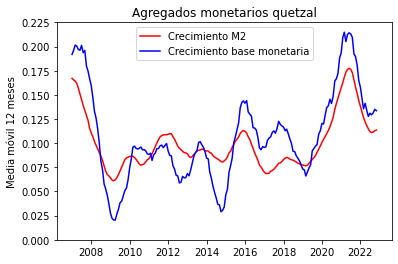

In [ ]:
last_many_months = -12 * 17 + 1

mobile_avg_m2national = np.array(trends.get_accumulated_values(
    trends.get_yearonyear_variation(list(m2_national_df[M2_NATIONAL_CURRENCY]),inter_values_size=12)[last_many_months:]
    , lot_size=12)[last_many_months+12:])/12

plt.plot(m2_national_df['date'][-len(mobile_avg_m2national):],
         mobile_avg_m2national,
         label="Crecimiento M2", color="r")
plt.ylim(0,0.20)
plt.ylabel("Media móvil 12 meses")
plt.legend()



mobile_avg_totalmoneybase = np.array(trends.get_accumulated_values(
    trends.get_yearonyear_variation(list(total_monetary_base_df[TOTAL_MONETARY_BASE]),
                             inter_values_size=12)[last_many_months:]
    , lot_size=12)[last_many_months+12:])/12

plt.plot(total_monetary_base_df['date'][-len(mobile_avg_totalmoneybase):],
         mobile_avg_totalmoneybase,
         label="Crecimiento base monetaria", color="b")
plt.ylim(0,0.225)
plt.ylabel("Media móvil 12 meses")
plt.legend()
plt.title("Agregados monetarios quetzal")
plt.show()


quetzal_monetary_aggregates_data = {
    "Mes": m2_national_df['month'].astype(str)[-len(mobile_avg_m2national):],
    "Fecha": m2_national_df['date'][-len(mobile_avg_m2national):],
    "Crecimiento M2": mobile_avg_m2national,
    "Crecimiento base monetaria": mobile_avg_totalmoneybase
}

In [ ]:
quetzal_monetary_aggregates_csv = "Agregados-Monetarios-Quetzal-Media-Movil-12-Meses.csv"
quetzal_monetary_aggregates_df = pd.DataFrame(quetzal_monetary_aggregates_data)
quetzal_monetary_aggregates_df.iloc[:,2:] *= 100
quetzal_monetary_aggregates_df.to_csv(quetzal_monetary_aggregates_csv, index=False)

In [ ]:
bucket_path = 'ufm-market-trends/guatemala/agregados-monetarios/agregados-monetarios-crecimiento'
csv_file = quetzal_monetary_aggregates_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Agregados-Monetarios-Quetzal-Media-Movil-12-Meses.csv [Content-Type=text/csv]...
/ [1 files][ 10.4 KiB/ 10.4 KiB]                                                
Operation completed over 1 objects/10.4 KiB.                                     
Copying gs://ufm-market-trends/guatemala/agregados-monetarios/agregados-monetarios-crecimiento/Agregados-Monetarios-Quetzal-Media-Movil-12-Meses.csv [Content-Type=text/csv]...
/ [1 files][ 10.4 KiB/ 10.4 KiB]                                                
Operation completed over 1 objects/10.4 KiB.                                     
Mes,Fecha,Crecimiento M2,Crecimiento base monetaria
2007-01,2007-01-01,16.70612672259045,19.181122424129697
2007-02,2007-02-01,16.538535526350397,19.628631017757023
2007-03,2007-03-01,16.422426732048326,20.150757387497894
2007-04,2007-04-01,16.187864581998124,20.03732567765132
2007-05,2007-05-01,15.67299952554834,19.689261855222597
2007-06,2007-06-01,15.05794114676768,19.616683534882366
2007-07,2007

## Dolarización economía

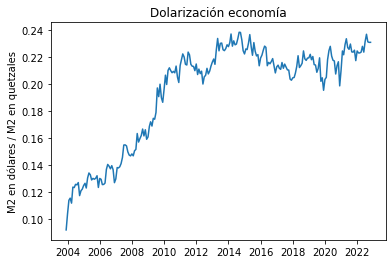

In [ ]:
last_many_months = -12 * 19

DOLARIZATION_ECONOMY = "Dolarización economía"

dolarization_economy_data = {
    'labels': m2_national_df['month'].astype(str)[last_many_months:],
    'dates': m2_national_df['date'][last_many_months:],
    DOLARIZATION_ECONOMY: list(m2_foreign_df[M2_FOREIGN_CURRENCY][last_many_months:] 
          / 
          m2_national_df[M2_NATIONAL_CURRENCY][last_many_months:])
}

plt.plot(dolarization_economy_data['dates'],
         dolarization_economy_data[DOLARIZATION_ECONOMY])
plt.title("Dolarización economía")
plt.ylabel("M2 en dólares / M2 en quetzales")
plt.show()

In [ ]:
dolarization_economy_csv = "Dolarizacion-Economia.csv"
dolarization_economy_df = pd.DataFrame(dolarization_economy_data)
dolarization_economy_df.iloc[:,2:] *= 100
dolarization_economy_df.to_csv(dolarization_economy_csv, index=False)

In [ ]:
bucket_path = 'ufm-market-trends/guatemala/agregados-monetarios/dolarizacion-economia'
csv_file = dolarization_economy_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Dolarizacion-Economia.csv [Content-Type=text/csv]...
/ [1 files][  8.4 KiB/  8.4 KiB]                                                
Operation completed over 1 objects/8.4 KiB.                                      
Copying gs://ufm-market-trends/guatemala/agregados-monetarios/dolarizacion-economia/Dolarizacion-Economia.csv [Content-Type=text/csv]...
/ [1 files][  8.4 KiB/  8.4 KiB]                                                
Operation completed over 1 objects/8.4 KiB.                                      
labels,dates,Dolarización economía
2003-12,2003-12-01,9.177352128506534
2004-01,2004-01-01,10.365891642614306
2004-02,2004-02-01,11.372002348212357
2004-03,2004-03-01,11.530075645728376
2004-04,2004-04-01,11.161271731822112
2004-05,2004-05-01,12.348024682546876
2004-06,2004-06-01,12.315208413842226
2004-07,2004-07-01,12.552196033758284
2004-08,2004-08-01,12.515342679562899
2004-09,2004-09-01,12.684052918980559
2004-10,2004-10-01,11.718095363550209
2004-11,2004-11-0